In [43]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [44]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithmetic\IPyNb


In [45]:
df = pd.read_csv("../Python/Output/Momentum.txt", sep='\t')
df.head()

,2n,(2n-1)!!,Value,Uncertainty
0,0,1.0,0.999999,1.063143e-17
1,2,1.0,0.999986,1.009642e-17
2,4,3.0,2.999610,2.998916e-17
3,6,15.0,14.989330,1.492680e-16
4,8,105.0,104.705853,1.040950e-15


In [46]:
def LinearFit(minOrder, xlim=[], ylim=[], withDiff=True):
    sFit = np.polyfit( df[df['2n']> minOrder]['2n'], np.log(df[df['2n']> minOrder]['Value']), 1 )
    df['Linear Fit'] =  np.exp(df['2n'] *sFit[0] + sFit[1])
    df['Diff %'] = (df['Linear Fit'] - df['Value'])/df['Value']*100
    #print(math.exp(sFit[1]), math.exp(sFit[0]))
    
    fig, ax = plt.subplots()
    ax.set_title(f'Variance Momentum and Linear Fit with starting 2n={minOrder}')
    ax.set_xlabel('2n')
    if xlim:
        ax.set_xlim(xlim)
    ax.set_ylabel('Variance Momentum')
    ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    ax.plot(df['2n'], df['Value'], 'm-', label='Variance Momentum Value')
    ax.plot(df['2n'], df['(2n-1)!!'], 'b-.', label='(2n-1)!!')
    ax.plot(df['2n'], df['Linear Fit'], 'c--', label=f'Linear Fit: {math.exp(sFit[1]):.3e} * {math.exp(sFit[0]):.3f}^2n')
    ax.plot(df['2n'], df['Uncertainty'], 'r:', label='Variance Momentum Uncertainty')
    if not withDiff:
        ax.legend(bbox_to_anchor=(0.6, 1.0))
        return 
    ax.legend(bbox_to_anchor=(1, 0.27))
    
    ax2 = ax.twinx()
    ax2.set_ylabel('Fit Difference [%]')
    ax2.plot(df['2n'], df['Diff %'], 'c:', label='Fit Difference [%]')
    ax2.legend(bbox_to_anchor=(0.37, 1))
    
    

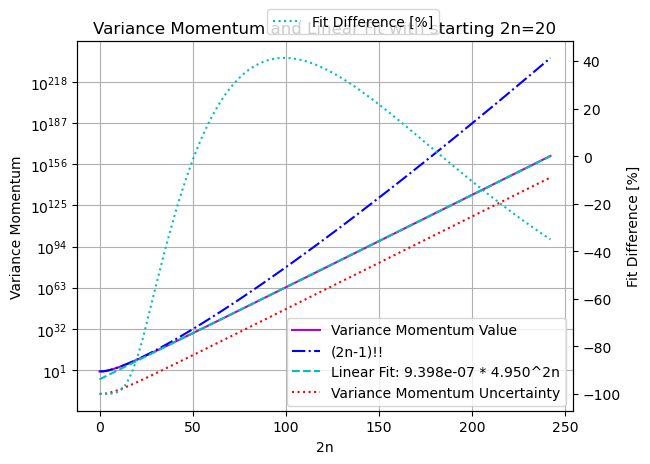

In [47]:
LinearFit(20)

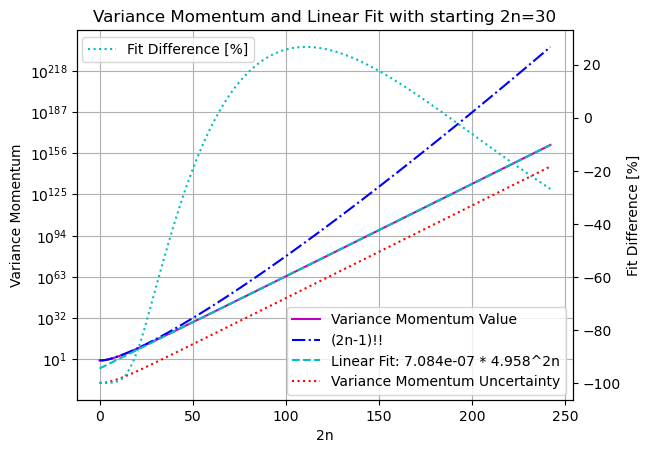

In [48]:
LinearFit(30)

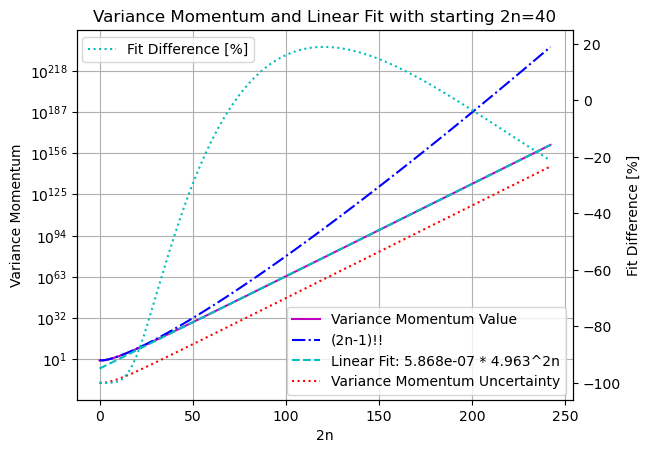

In [49]:
LinearFit(40)

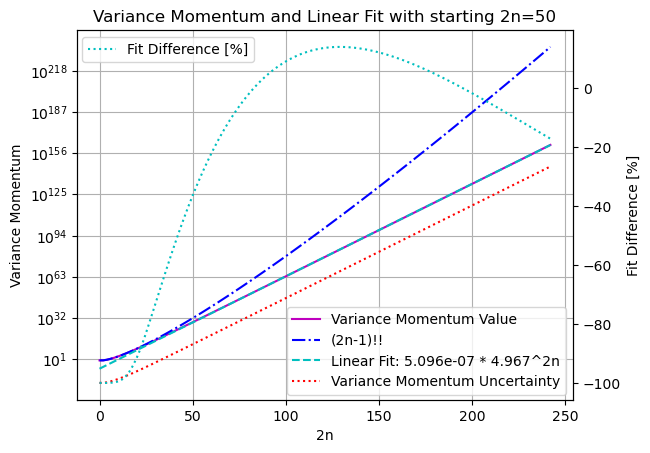

In [50]:
LinearFit(50)

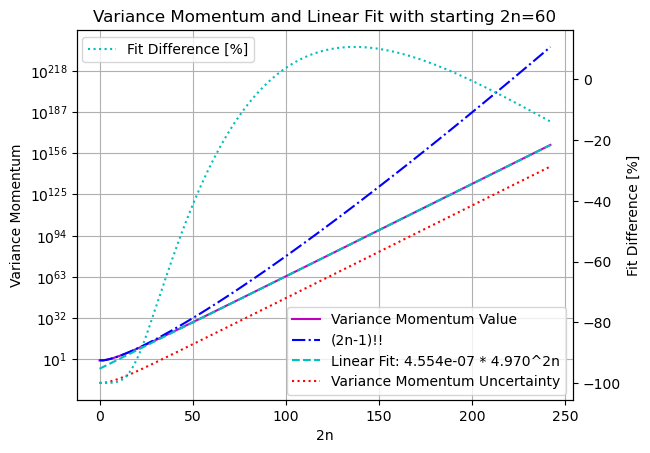

In [51]:
LinearFit(60)

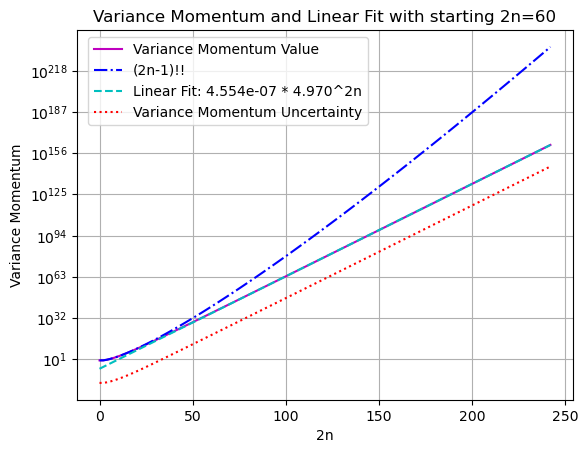

In [52]:
LinearFit(60, withDiff=False)